# Color Histograms
In this notebook, I will experiment with generating color histograms both for full images and for image patches.

Let's start by displaying an image:

In [1]:
import IPython.display

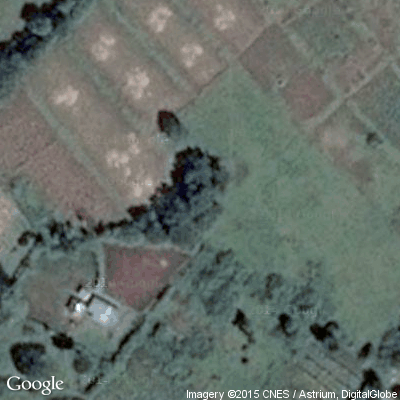

In [2]:
imageDir = '../images/'
IPython.display.Image(filename=imageDir+'test_images/test1.png')

## OpenCV implementation
The first thing that we will try is to use OpenCV's `calcHist` function to get the color histogram for this image and plot it. We will follow this [tutorial](http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html).

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

The first way to make a histogram is to directly plot it from the image pixel values using Matplotlib's `hist` function:

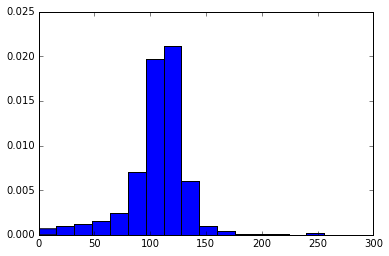

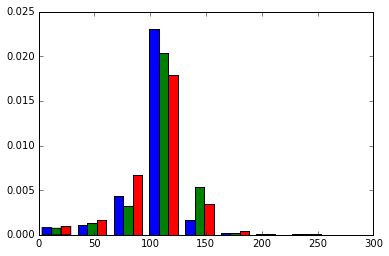

In [4]:
test1 = cv2.imread(imageDir + 'test_images/test1.png')
# Ravel flattens the array into 1D
# Plots histogram of all channels (BGR)
fig1 = plt.figure()
plt.hist(x=test1.ravel(), bins=16, range=[0,256], normed=True,\
         histtype='bar')
plt.show()

# Plots BGR channels separately
fig2 = plt.figure()
plt.hist(x=(test1[:,:,0].ravel(), test1[:,:,1].ravel(),\
            test1[:,:,2].ravel()), bins=8, range=[0,256], normed=True,\
         histtype='bar')
plt.show()

Another method is to use OpenCV's `calcHist` function:

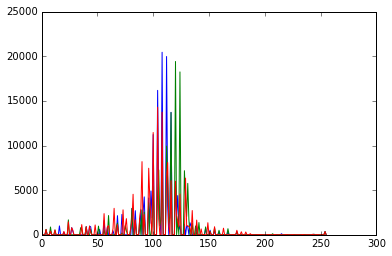

In [8]:
color = ('b', 'g', 'r')
fig1 = plt.figure()
# Plot histogram for each color channel separately
for i,col in enumerate(color):
    histr = cv2.calcHist(images=[test1], channels=[i], mask=None,\
                        histSize=[256], ranges=[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,300])
plt.show()

#### Using a mask
In some cases we'll want to find the histogram of a specific region of the image--for this, we can use a mask:

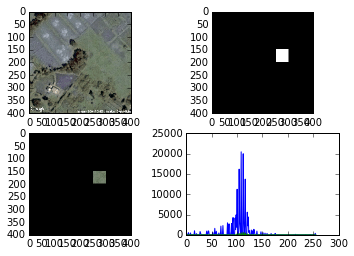

In [22]:
# Creating a mask
mask = np.zeros(test1.shape[:2], np.uint8)
mask[150:200, 250:300] = 255
masked_img = cv2.bitwise_and(src1=test1, src2=test1, mask=mask)

# Creating histogram with and without mask
hist_full = cv2.calcHist([test1], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([test1], [0], mask, [256], [0,256])

# Plotting results
fig1 = plt.figure()
plt.subplot(221)
plt.imshow(test1)
plt.subplot(222)
plt.imshow(mask, cmap='gray')
plt.subplot(223)
plt.imshow(masked_img)
plt.subplot(224)
plt.plot(hist_full)
plt.plot(hist_mask)
plt.xlim([0,300])
plt.show()

## Making a histogram function
Now let's put together some code to plot histograms. This function will take in an image (or image patch) and plot a color histogram with each of the channels shown clearly.

In [24]:
test1 = cv2.imread(imageDir + 'test_images/test1.png')

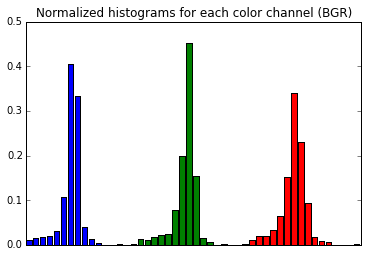

In [83]:
color = ('b', 'g', 'r')
binSize = 16
bins = binSize
fig1 = plt.figure()
# Plot histogram for each color channel separately
for i,col in enumerate(color):
    histr = cv2.calcHist(images=[test1], channels=[i], mask=None,\
                        histSize=[binSize], ranges=[0,256])
    histr = histr / histr.sum()
    plt.bar(range(bins-binSize, bins), histr, color=col)
    plt.xlim([0,3*binSize])
    bins += binSize
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.title('Normalized histograms for each color channel (BGR)')
plt.show()

That looks pretty good... let's turn it into a function. Actually, let's separate it into two functions that 1. calculate the color histogram feature vector and 2. plot the color histogram.

In [90]:
def calc_color_hist(image, bins=16, norm=True):
    """
    This function calculates and returns the color histogram feature
    vector for a given image.
    :param image: The image to calculate the color histogram for
    :param bins: The number of bins per color channel
    :param norm: Boolean, normalizes counts to sum to 1 (within channel)
    :returns: The color histogram feature vector (length 3*bins)
    """
    hist = np.zeros((3*bins,1))
    # Fill feature vector by channel
    color = ('b', 'g', 'r')
    for i,col in enumerate(color):
        channelHist = cv2.calcHist(images=[image], channels=[i], mask=None,\
                                   histSize=[bins], ranges=[0,256])
        # Normalize histogram
        if norm:
            channelHist = channelHist / channelHist.sum()
        hist[bins*i:bins*(i+1)] = channelHist
    return hist

In [91]:
def plot_color_hist(image, bins=16, norm=True):
    """
    This function computes the color histogram feature vector and plots
    the color histogram with each channel (BGR).
    :param image: The image to plot the color histogram for
    :param bins: The number of bins per color channel
    :param norm: Normalizes counts to sum to 1
    """
    # Compute histogram feature vector
    hist = calc_color_hist(image, bins, norm)
    # Plotting histogram
    color = ('b', 'g', 'r')
    for i,col in enumerate(color):
        plt.bar(range(bins*i,bins*(i+1)), hist[bins*i:bins*(i+1)],\
                color=col)
    plt.xlim([0,3*bins])
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    plt.title('Normalized histograms for each color channel (BGR)')
    plt.show()

Let's see if these functions work:

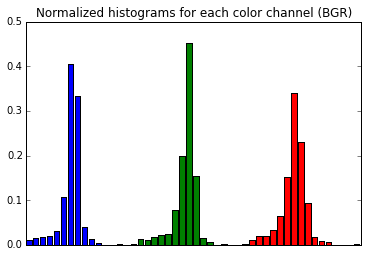

In [92]:
# Plotting color histogram for test1 image
plot_color_hist(test1, bins=16, norm=True)

What about for an image patch? Let's try it for a patch of the test1 image:

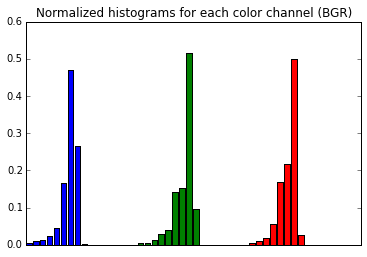

In [93]:
patch1 = test1[100:300,200:250,:]
plot_color_hist(patch1)

The next step is to figure out how to do classification using color histograms!